My goal here is to find model that is the most effective in describing relationship `target ~ data` and see what info about this relationship I can extract from it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, RegressorMixin

In [2]:
df = pd.read_csv('train.csv')

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,target
0,236,488,16,221,382,97,-4.472136,0.107472,0,132,281,336,99,3.880098,1.797502,3.252475,12.131981,3.091361,5.630319,4.466373,2.511203,5.982724,4.541159,12.740476,12.634929,4.050294,11.827245,3.568321,13.420537,8.251807,2.287900,14.834430,0.082253,2.975561,5.223753,1.212287,7.302797,7.083149,3.610350,7.767512,7.829657,8.395356,1.583711,10.125020,13.340874,0.870542,1.962937,7.466666,11.547794,8.822916,9.046424,7.895535,11.010677,20.107472
1,386,206,357,232,1,198,7.810250,0.763713,1,143,109,123,130,12.099770,10.670550,14.137111,0.217037,1.426881,0.916617,8.168254,0.432319,5.872218,10.401401,12.843301,7.529992,12.525335,8.655344,8.499587,5.602552,4.187738,13.205982,5.432667,12.379275,11.938420,6.057282,2.581280,11.785456,4.445564,11.141346,0.839731,1.481908,8.920653,4.450379,10.584802,12.484882,7.168680,2.885415,12.413973,10.260494,10.091351,9.270888,3.173994,13.921871,61.763713
2,429,49,481,111,111,146,8.602325,0.651162,1,430,488,138,80,2.947479,12.671352,13.279918,13.163338,9.051826,11.605822,11.094161,10.461813,9.827713,2.206019,9.914789,4.448482,8.864810,10.837476,14.167872,13.456857,14.855511,7.596095,4.928033,2.439930,6.791165,8.709536,1.363087,4.980975,2.182372,14.673614,8.083289,6.601472,6.789200,12.982035,10.273114,14.030257,0.394970,8.160625,12.592059,8.937577,2.265191,11.255721,12.794841,12.080951,74.651162
3,414,350,481,370,208,158,8.306624,0.424645,1,340,111,38,177,5.368252,6.765946,0.544415,7.175573,14.515096,1.901743,9.231263,9.600810,10.058844,5.680021,8.238473,0.272760,11.892743,4.030567,14.946749,7.121632,6.507572,12.462688,12.222522,0.318528,5.350321,3.143358,10.291804,13.105170,10.159100,3.671488,11.087198,1.289054,0.249375,2.967133,6.885179,2.789577,6.416708,10.549814,11.456437,6.468099,2.519049,0.258284,9.317696,5.383098,69.424645
4,318,359,20,218,317,301,8.124038,0.767304,1,212,141,417,343,14.592218,6.483629,9.159313,5.083046,8.772015,7.687242,11.106926,13.926358,0.914295,1.418124,4.504223,6.158475,1.790923,7.049614,14.409808,11.615837,5.675790,9.136146,10.640432,14.051122,2.240417,3.271828,5.061455,3.679880,2.948615,6.419577,14.873100,14.806887,9.992545,3.701959,11.162686,1.886560,1.919999,2.268203,0.149421,4.105907,10.416291,6.816217,8.586960,4.512419,66.767304


In [3]:
test = pd.read_csv('hidden_test.csv')

test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,259,388,402,340,156,382,3.316625,0.218760,1,164,183,411,239,1.636870,4.316116,3.087304,12.844492,0.054046,0.643383,3.104759,5.579529,7.633182,9.056701,8.621463,4.039640,1.191639,2.775038,9.728365,6.701686,11.456474,3.380898,4.866598,6.705850,2.521471,3.124903,12.787034,7.653819,2.067580,14.527098,13.773822,6.570842,7.280782,9.876851,7.163474,10.227235,0.889111,9.190222,4.670908,0.931525,7.634177,0.158196,13.432551,2.511191
1,441,192,381,421,452,123,-8.888194,0.700228,0,349,229,420,476,6.256282,0.410825,0.693713,5.895766,7.309578,2.315738,6.204979,4.264013,11.956969,1.801893,13.581027,7.460250,7.883021,10.537323,12.286389,4.499934,3.302528,1.490149,10.010222,2.469233,9.206524,3.097949,14.556454,10.811960,14.584917,2.021892,7.956624,3.006465,10.685368,5.047971,10.619064,9.339161,4.221861,0.595563,13.865748,0.328453,11.507599,9.107966,1.302407,11.105604
2,83,129,107,156,247,191,2.645751,0.494556,1,297,448,420,428,5.724503,12.465191,1.977254,7.652835,2.649014,14.531226,1.293337,9.192163,7.218093,9.580598,10.240284,12.522093,11.639480,11.349518,10.959723,12.820784,9.176369,10.157479,4.107533,7.454075,12.178675,9.401233,10.292276,3.530603,12.680169,10.921196,8.008255,14.940933,4.579603,14.150860,1.819890,10.670237,10.350867,5.134417,5.898995,8.374986,4.638049,3.160023,2.243799,5.073030
3,183,438,191,116,491,403,-6.164414,0.511117,0,272,315,23,421,10.868374,8.335662,3.561422,9.939135,4.885376,7.706857,4.214658,10.346181,2.590524,1.511884,2.357567,5.231946,4.697991,11.870758,0.455004,0.645782,7.849633,5.334536,5.262470,9.251172,9.335831,9.708345,6.091409,6.789830,1.552119,12.569473,7.002166,4.999168,14.278131,0.650444,4.168135,12.782579,0.513072,0.321295,11.334062,11.735511,1.911520,8.365676,4.877288,11.601819
4,449,156,310,188,279,465,8.000000,0.756416,1,90,74,481,55,11.871029,10.237341,14.890562,4.589386,12.968020,4.907581,14.461897,13.128528,4.062875,2.253413,12.471074,7.078105,0.843648,14.961904,6.157512,11.370193,12.969449,7.130421,8.974373,6.173560,12.682708,7.864171,2.075725,14.339978,3.365456,6.278199,9.302832,9.715296,14.142186,9.875013,7.908122,1.140498,14.165074,7.688796,5.079241,8.152186,1.680403,13.215111,5.823109,1.038015


In [4]:
# train / test random split, ratio: 67 / 33
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns ='target'), df.target, test_size=0.33, random_state=42)

In [5]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
60218,162,420,384,303,353,264,-1.414214,0.090422,0,212,473,431,430,3.226636,12.302458,7.679883,4.948200,4.124744,9.490513,6.624459,4.355259,8.610018,10.251675,3.576945,5.756931,14.314530,2.536393,0.000470,14.213973,9.905807,14.134591,3.449960,0.333435,2.688833,13.641182,2.253917,14.367851,14.102382,13.793809,12.884390,11.405626,12.177713,5.423503,2.019925,4.742765,9.885733,9.996566,4.951996,14.394671,5.646507,14.443289,0.787502,9.554575
71976,488,193,493,307,242,299,9.165151,0.953662,1,476,265,143,159,10.765742,1.839144,3.829519,1.215648,11.304406,1.734616,13.035829,9.804732,0.380107,12.752649,11.078794,9.057302,1.149533,3.701963,14.308946,11.273246,5.706543,8.616027,10.802288,10.767579,2.180554,3.417458,14.226935,6.072692,1.458606,0.725592,3.765135,7.019127,8.523816,5.479414,6.978950,8.093087,0.547430,7.812144,9.439473,2.500863,14.217257,12.085956,11.556289,11.377990
84382,301,262,392,303,281,71,-8.774964,0.609912,0,291,11,324,95,1.347251,3.012285,7.362761,14.639869,3.813616,5.624963,9.760966,2.135026,10.221459,4.911120,4.397653,11.028018,1.996350,2.839689,0.750952,11.636611,11.557908,5.330906,10.372772,4.098176,2.072890,13.600948,10.205109,7.806121,13.901681,13.819293,4.795062,2.345200,3.959549,8.784092,11.644785,3.053057,5.151834,2.958646,0.060580,9.952607,8.895866,2.048837,4.647378,4.272977
88194,281,247,224,61,303,139,9.165151,0.390952,1,452,96,456,81,4.010177,13.075800,4.589003,10.066018,1.717211,7.054825,2.349250,14.770518,1.689331,1.976909,10.934589,6.538804,10.842944,2.481922,14.611925,4.679330,9.208179,0.372346,14.208202,5.164913,13.494057,2.702652,12.394242,12.396453,6.368434,0.668281,10.503720,4.523220,8.775177,2.411659,14.694413,5.751253,8.226443,1.299227,11.035040,5.155048,12.136917,0.110065,12.935372,12.123070
9410,387,301,456,224,433,479,8.366600,0.509749,1,418,417,299,55,7.993704,12.546860,7.339215,1.426025,2.593803,10.070643,6.510793,5.256854,1.612688,14.697511,10.952369,6.819828,12.205352,13.632284,5.272508,6.728595,0.456608,12.526262,14.589477,5.290385,14.980756,10.739845,13.780324,6.680421,11.952933,8.305333,1.010965,14.538451,11.930416,12.437355,12.229864,8.082259,2.478683,3.240439,6.064926,7.368369,0.235721,11.456150,0.825720,13.855184


In [6]:
y_train.head()

60218     2.090422
71976    84.953662
84382    77.609912
88194    84.390952
9410     70.509749
Name: target, dtype: float64

In [7]:
def calc_metrics(prediction_test, y_test):
    """Calculate main regression accuracy metrics."""
    MAE = metrics.mean_absolute_error(y_test, prediction_test)
    RMSE = metrics.root_mean_squared_error(y_test, prediction_test)
    RMSE_ratio = metrics.root_mean_squared_error(y_test, prediction_test) / np.mean(y_test)
    R_2 = metrics.explained_variance_score(y_test, prediction_test)

    metric_values = {
        'MAE':MAE,
        'RMSE':RMSE,
        'RMSE_ratio':RMSE_ratio,
        'R_2':R_2,
    }
    return metric_values
    
           
def plot_error(y_test, prediction_test):
    """Plot predictions agiant target and difference between them."""
    sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.grid()
    plt.show()

    sns.histplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.grid()
    plt.show()

def analysis(prediction_test, y_test):
    """Detailed analysis."""
    metric_values = calc_metrics(prediction_test, y_test)
    display(
        pd.DataFrame(metric_values, index=[0])\
            .style\
                .set_caption('Experiment results')\
                .format({
                    'MAE':'{:,.3f}',
                    'RMSE':'{:,.3f}',
                    'RMSE_ratio':'{:,.1%}',
                    'R_2':'{:,.3f}',
                })
    )
    plot_error(y_test, prediction_test)
    

We need some simple approach to serve as a benchmark:

In [8]:
class RandomModel(BaseEstimator, RegressorMixin):
    """Random regression model for benchmark."""
    def __init__(self, low=0.0, high=100.0, random_state=None):
        self.low = low
        self.high = high
        self.random_state = random_state
        
        if random_state is not None:
            np.random.seed(random_state)

    def fit(self, X, y=None):
        return self

    def predict(self, X):
        """Predict random values uniformly distributed between self.low and self.high"""
        n_samples = X.shape[0]
        return np.random.uniform(self.low, self.high, n_samples)

In [9]:
# variants of preprocessing

def do_nothing(data):
    """Just using data as is."""
    return data

def add_power_abs_var6(data):
    """Add variable var6_power2 = abs(var6)**2"""
    return data.assign(var6_power2 = lambda df_: np.power(np.abs(df_['6']), 2))

We will use additional `var6_power2 = abs(var6)**2` variable in some experiments, from EDA it looks like it can explain most of target's variation

In [10]:
# List of experiments
# from benchmark approach, to simple models to heavier models  
experiments = [
    {   
        'preprocessing':do_nothing,
        'model':RandomModel(random_state = 1)
    },
    {   
        'preprocessing':do_nothing,
        'model':LinearRegression(n_jobs = 2)
    },
    {   
        'preprocessing':add_power_abs_var6,
        'model':LinearRegression(n_jobs = 2)
    },
    {   
        'preprocessing':do_nothing,
        'model':DecisionTreeRegressor(
                  max_depth = 3,
                  random_state = 1, 
            )
    },
    {   
        'preprocessing':do_nothing,
        'model':DecisionTreeRegressor(
                  max_depth = 4,
                  random_state = 1, 
            )
    },
    {   
        'preprocessing':do_nothing,
        'model':DecisionTreeRegressor(
                  max_depth = 5,
                  random_state = 1, 
            )
    },
    {   
        'preprocessing':do_nothing,
        'model':DecisionTreeRegressor(
                  random_state = 1, 
            )
    },
    {   
        'preprocessing':add_power_abs_var6,
        'model':DecisionTreeRegressor(
                  random_state = 1, 
            )
    },
    {   
        'preprocessing':do_nothing,
        'model':RandomForestRegressor(
               n_jobs = 2, 
               max_depth = 5,
               n_estimators = 20,
               random_state = 1, 
        )
    },
    {   
        'preprocessing':do_nothing,
        'model':RandomForestRegressor(
               n_jobs = 2, 
               max_depth = 8,
               n_estimators = 20,
               random_state = 1, 
        )
    },
    {   
        'preprocessing':do_nothing,
        'model':RandomForestRegressor(
                   n_jobs = 2, 
                   n_estimators = 20,
                   random_state = 1, 
            )
    },
    {   
        'preprocessing':do_nothing,
        'model':LGBMRegressor(
                random_state = 1,
                n_jobs = 2
            )
    },
    {   
        'preprocessing':do_nothing,
        'model':XGBRegressor(
                random_state = 1,
                n_jobs = 2
            )
    },
]

In [11]:
# running the experiments and saving results to list
experiment_results = []
for exp in experiments:
    preprocessing = exp["preprocessing"]
    model = exp["model"]
    print(f'Launch experiment with model {model}')
    model.fit(preprocessing(X_train), y_train)
    prediction_test = model.predict(preprocessing(X_test))
    metric_values = calc_metrics(prediction_test, y_test)
    result = metric_values.copy()

    result['preprocessing'] = preprocessing
    result['preprocessing_name'] = preprocessing.__name__
    result['model'] = model
    experiment_results.append(result)

Launch experiment with model RandomModel(random_state=1)
Launch experiment with model LinearRegression(n_jobs=2)
Launch experiment with model LinearRegression(n_jobs=2)
Launch experiment with model DecisionTreeRegressor(max_depth=3, random_state=1)
Launch experiment with model DecisionTreeRegressor(max_depth=4, random_state=1)
Launch experiment with model DecisionTreeRegressor(max_depth=5, random_state=1)
Launch experiment with model DecisionTreeRegressor(random_state=1)
Launch experiment with model DecisionTreeRegressor(random_state=1)
Launch experiment with model RandomForestRegressor(max_depth=5, n_estimators=20, n_jobs=2, random_state=1)
Launch experiment with model RandomForestRegressor(max_depth=8, n_estimators=20, n_jobs=2, random_state=1)
Launch experiment with model RandomForestRegressor(n_estimators=20, n_jobs=2, random_state=1)
Launch experiment with model LGBMRegressor(n_jobs=2, random_state=1)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testin

In [12]:
experiment_results_df = pd.DataFrame(experiment_results)

experiment_results_df\
    .style\
        .set_caption('Experiment results')\
        .format({
            'MAE':'{:,.3f}',
            'RMSE':'{:,.3f}',
            'RMSE_ratio':'{:,.1%}',
            'R_2':'{:,.3f}',
        })\
        .background_gradient(subset=['MAE', 'RMSE', 'RMSE_ratio', 'R_2'])

,MAE,RMSE,RMSE_ratio,R_2,preprocessing,preprocessing_name,model
0,33.305,40.854,82.1%,-0.991,,do_nothing,RandomModel(random_state=1)
1,25.108,28.968,58.2%,-0.001,,do_nothing,LinearRegression(n_jobs=2)
2,0.000,0.000,0.0%,1.000,,add_power_abs_var6,LinearRegression(n_jobs=2)
3,8.010,10.447,21.0%,0.870,,do_nothing,"DecisionTreeRegressor(max_depth=3, random_state=1)"
4,4.783,6.448,13.0%,0.950,,do_nothing,"DecisionTreeRegressor(max_depth=4, random_state=1)"
5,2.960,4.364,8.8%,0.977,,do_nothing,"DecisionTreeRegressor(max_depth=5, random_state=1)"
6,0.007,0.009,0.0%,1.000,,do_nothing,DecisionTreeRegressor(random_state=1)
7,0.003,0.005,0.0%,1.000,,add_power_abs_var6,DecisionTreeRegressor(random_state=1)
8,2.213,3.465,7.0%,0.986,,do_nothing,"RandomForestRegressor(max_depth=5, n_estimators=20, n_jobs=2, random_state=1)"
9,0.470,0.909,1.8%,0.999,,do_nothing,"RandomForestRegressor(max_depth=8, n_estimators=20, n_jobs=2, random_state=1)"


best_model LinearRegression(n_jobs=2)
best_model_preprocessing add_power_abs_var6


,MAE,RMSE,RMSE_ratio,R_2
0,0.000,0.000,0.0%,1.000


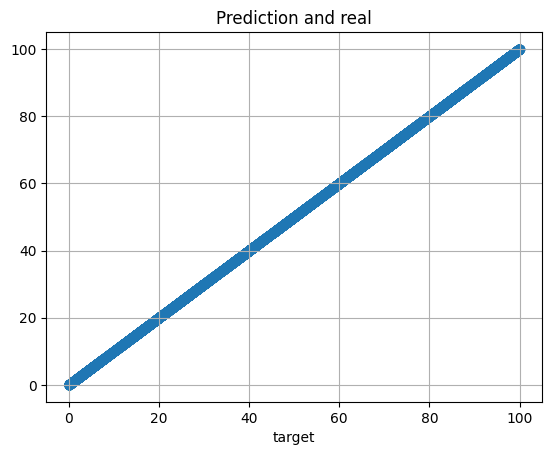

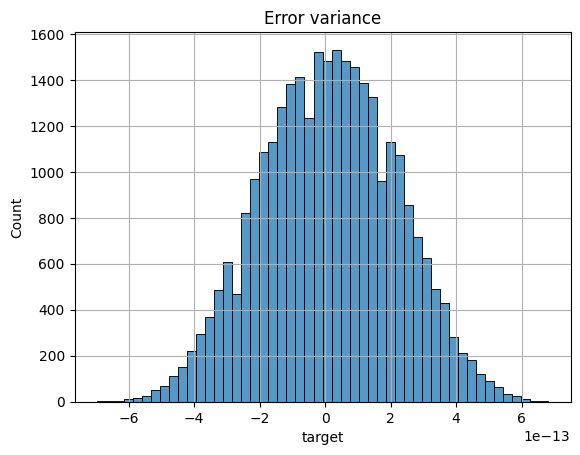

In [13]:
best_model = experiment_results_df.nsmallest(1, 'RMSE')['model'].iloc[0]
best_model_preprocessing = experiment_results_df.nsmallest(1, 'RMSE')['preprocessing'].iloc[0]
print('best_model', best_model)
print('best_model_preprocessing', best_model_preprocessing.__name__)
prediction_test = best_model.predict(best_model_preprocessing(X_test))
analysis(
        prediction_test = prediction_test, 
        y_test = y_test
    )

Look's like linear regression with additional feature `power_abs_var6` is enough to fully solve this task. Look's like when this synthetic dataset was created no additional noise was added, target can be fully explained with available data

Let's check model weights, in this case (because linear regression fully fits to data, without error) we can derive equation of `target` variable

In [14]:
def check_linear_model_weights(model, X_test):
    """Display model weights and intercept."""
    features = pd.DataFrame({
        'Variable': X_test.columns,
        'weight': model.coef_
    })
    
    features = pd.concat([
        features,
        pd.DataFrame({'Variable': 'intercept', 'weight': model.intercept_},
            index=[len(features)]
        )
    ])
    display(
        features\
            .sort_values('weight', ascending=False)\
            .style\
                .format({'weight':'{:,.4f}'})
    )

In [15]:
check_linear_model_weights(best_model, best_model_preprocessing(X_test))

,Variable,weight
53,var6_power2,1.0000
7,7,1.0000
8,8,0.0000
54,intercept,0.0000
22,22,0.0000
20,20,0.0000
17,17,0.0000
32,32,0.0000
49,49,0.0000
26,26,0.0000


Look's like `target = abs(var6)**2 + var7`, let's check

In [16]:
class Model(BaseEstimator, RegressorMixin):

    def fit(self, X, y=None):
        return self

    def predict(self, X):
        """Predicts target using formula we discovered"""
        var6_power2 = np.power(np.abs(X['6']), 2)
        var7 = X['7']
        return var6_power2 + var7

,MAE,RMSE,RMSE_ratio,R_2
0,0.000,0.000,0.0%,1.000


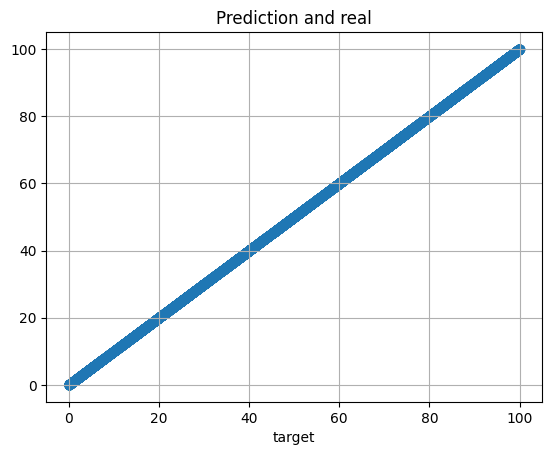

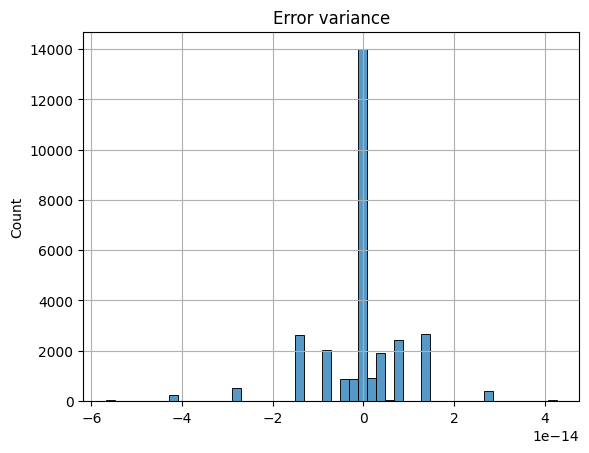

In [17]:
model = Model()
prediction_test = model.predict(X_test)
analysis(
        prediction_test = prediction_test, 
        y_test = y_test
    )

Look's right, equation `target = abs(var6)**2 + var7` fully explains target